In [484]:
import numpy as np
import pandas as pd

In [485]:
from sklearn.datasets import load_iris
iris = load_iris()

In [581]:
X = iris.data[50:,:]
y = iris.target[50:]

In [582]:
X = X[:,[0,2]]

In [583]:
y[y==2] = -1

In [489]:
y[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [490]:
from sklearn.model_selection import train_test_split
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

In [586]:
class ScratchSVMClassifier():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, Threshold): ##, verbose  verbose
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.Threshold = Threshold
        
#         self.verbose = verbose
        # 損失を記録する配列を用意
#         self.loss = np.zeros(self.iter)
#         self.val_loss = np.zeros(self.iter)

        
#     def _kernel_fnk(self,X1, X2):
#         return X1 @ X2.T
    
    
    def _SVC_hypothesis(self, X, y):
        y = y.reshape(-1,1)
#         y_d = np.dot(y, y.T)
        y_d = np.dot(y, y.T)
        X_d = np.dot(X, X.T)
        X_y_d = X_d * y_d.T
#         X_y_lam_d = np.dot(X_y_d, self.lambda_)
        X_y_lam_d = np.dot(X_y_d, self.lambda_)
        self.lambda_ += self.lr * (1 - X_y_lam_d.sum())
        return self.lambda_
    

    def fit(self, X, y, X_val=None, y_val=None):
        np.random.seed(0)
        self.lambda_ = np.random.rand(X.shape[0], 1) * 0.03
        
        for i in range(self.iter):
            self._SVC_hypothesis(X, y)
        
        self.index_l = []
        for j, i in enumerate(self.lambda_):
            if i > self.Threshold:
                self.index_l .append(j)
        self.lambda_sv = self.lambda_[self.index_l]
        self.X_sv = X[self.index_l]
        self.y_sv = y[self.index_l]
        
    def predict(self, X):
#         self.X_k = np.dot(X, self.X_sv.T)
#         self.X_k_y = np.dot(self.X_k, self.y_sv)
#         self.y_pred = np.dot(self.lambda_sv, self.X_k_y.T)
        
#         print(self.X_sv.shape,"X_sv")
#         print(self.y_sv.shape,"y_sv")     
#         print(self.lambda_sv,"lambda_sv")
#         self.X_k_sv = np.dot(X, self.X_sv.T)
#         print(self.X_k_sv.shape,"X_k_sv")     
# #         self.lam_y = (self.lambda_sv * self.y_sv.T)
# #         self.y_pred = (self.lam_y @ self.X_k_sv).sum(axis=1)
#         self.X_k_sv = np.dot(self.X_sv, X.T)
    
#         self.lam_y = np.dot(self.lambda_sv, self.y_sv.T)
#         print(np.dot(X, self.X_sv.T).shape,"dot")  #
#         print((self.lambda_sv * self.y_sv).shape,"lambda_y")  #(21, 21)
        self.y_sv = self.y_sv.reshape(-1,1)
        self.y_pred = np.dot(np.dot(X, self.X_sv.T), (self.y_sv * self.lambda_sv))
        print(self.lambda_sv.shape,"lambda_sv")
        print(self.y_sv.shape, "y_sv")
        print(self.y_pred.shape, "y_pred")
#         self.y_pred =  np.dot(self.X_sv, X.T)
#         print(self.lam_y.shape,"lam_y")
#         print(self.X_k_sv.shape,"X_k_sv")
#         self.y_pred = np.sum(self.lam_y @ self.X_k_sv.T, axis=0)
#         print(self.y_pred.shape)

        return self.y_pred

#121, 162, 326

In [594]:
SV = ScratchSVMClassifier(num_iter=10000, lr = 0.00000001, bias=True, Threshold=0.025)

In [595]:
SV.fit(X,y)
# SV.fit(X_train, y_train)

In [596]:
SV.lambda_

array([[0.01864983],
       [0.02364111],
       [0.02026833],
       [0.01853192],
       [0.01489507],
       [0.02156225],
       [0.01531304],
       [0.02893862],
       [0.03109531],
       [0.01368867],
       [0.02593718],
       [0.01805227],
       [0.01922676],
       [0.02995333],
       [0.00431651],
       [0.00479931],
       [0.00279198],
       [0.02716402],
       [0.02553013],
       [0.02828579],
       [0.03154398],
       [0.02616018],
       [0.01602981],
       [0.0256013 ],
       [0.00573366],
       [0.02138306],
       [0.00648603],
       [0.03052549],
       [0.01784088],
       [0.01462528],
       [0.0101221 ],
       [0.02541244],
       [0.01586994],
       [0.01923845],
       [0.00274912],
       [0.02071449],
       [0.0205483 ],
       [0.02069345],
       [0.03049787],
       [0.02264004],
       [0.01297066],
       [0.01529639],
       [0.02311436],
       [0.00399219],
       [0.02218843],
       [0.02230456],
       [0.0084969 ],
       [0.006

In [597]:
SV.lambda_sv.shape

(20, 1)

In [598]:
SV.index_l

[7, 8, 10, 13, 17, 18, 19, 20, 21, 23, 27, 31, 38, 52, 66, 68, 70, 72, 89, 98]

In [599]:
y_pred = SV.predict(X)

(20, 1) lambda_sv
(20, 1) y_sv
(100, 1) y_pred


In [600]:
y_pred

array([[6.4958037 ],
       [6.0063789 ],
       [6.49171084],
       [5.20583203],
       [6.11008625],
       [5.51286123],
       [6.00228603],
       [4.55038308],
       [6.18058878],
       [4.96111963],
       [4.68729526],
       [5.55425179],
       [5.55834465],
       [5.86128098],
       [5.14351524],
       [6.18468164],
       [5.4423587 ],
       [5.45054443],
       [5.86537385],
       [5.24312973],
       [5.75348076],
       [5.62884718],
       [6.06869569],
       [5.86128098],
       [5.93996924],
       [6.11417912],
       [6.38800349],
       [6.38391062],
       [5.7243688 ],
       [5.18081293],
       [5.13942237],
       [5.10621754],
       [5.38413477],
       [5.92359778],
       [5.30135365],
       [5.7243688 ],
       [6.28429613],
       [5.90267154],
       [5.30953938],
       [5.20583203],
       [5.33865135],
       [5.82807615],
       [5.4173396 ],
       [4.6208856 ],
       [5.34274421],
       [5.41324674],
       [5.41324674],
       [5.798

In [601]:
y_pred[y_pred <= 0].shape

(0,)

In [602]:
y_test

array([ 1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1])

In [576]:
np.random.seed(0)
lambda_ = np.random.rand(X.shape[0], 1)
print(lambda_[:10])
lr = 0.0000001
y = y.reshape(-1,1)
y_d = np.dot(y, y.T)
X_d = np.dot(X, X.T)
X_y_d = X_d * y_d
X_y_lam_d = np.dot(X_y_d, lambda_)
lambda_ += lr * (1 - X_y_lam_d.sum())

[[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]
 [0.4236548 ]
 [0.64589411]
 [0.43758721]
 [0.891773  ]
 [0.96366276]
 [0.38344152]]


In [577]:
lambda_.shape

(100, 1)

In [578]:
X_y_lam_d

array([[ 180.83887644],
       [ 165.62436824],
       [ 178.63205416],
       [ 142.52066672],
       [ 168.25409935],
       [ 148.20303775],
       [ 163.41754596],
       [ 126.60131047],
       [ 170.74286084],
       [ 134.91341261],
       [ 129.37201119],
       [ 152.75765192],
       [ 154.96447421],
       [ 158.44002296],
       [ 144.44554978],
       [ 172.94968312],
       [ 145.71427625],
       [ 150.12792082],
       [ 160.64684524],
       [ 144.86845861],
       [ 153.60346957],
       [ 157.4532357 ],
       [ 163.69948517],
       [ 158.44002296],
       [ 165.34242902],
       [ 170.46092163],
       [ 176.00232306],
       [ 173.79550077],
       [ 155.66932225],
       [ 146.79334167],
       [ 142.2387275 ],
       [ 142.09775789],
       [ 149.8459816 ],
       [ 156.5151399 ],
       [ 140.73675326],
       [ 155.66932225],
       [ 173.37259195],
       [ 162.99463713],
       [ 145.15039782],
       [ 142.52066672],
       [ 143.08454515],
       [ 158.299

In [604]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ["o", "^"]

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    print(y_pred)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

(20, 1) lambda_sv
(20, 1) y_sv
(196000, 1) y_pred
[[3.93223182 3.93928207 3.94633232 ... 6.73118204 6.73823229 6.74528255]
 [3.9355523  3.94260255 3.94965281 ... 6.73450252 6.74155278 6.74860303]
 [3.93887278 3.94592304 3.95297329 ... 6.73782301 6.74487326 6.75192351]
 ...
 [5.54930702 5.55635727 5.56340752 ... 8.34825724 8.35530749 8.36235774]
 [5.5526275  5.55967775 5.566728   ... 8.35157772 8.35862797 8.36567823]
 [5.55594798 5.56299823 5.57004849 ... 8.3548982  8.36194846 8.36899871]]


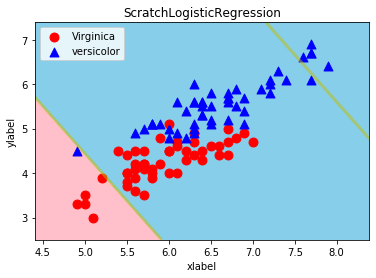

In [605]:
decision_region(X, y, SV, 
                 step=0.01, title='ScratchLogisticRegression', 
                 xlabel='xlabel', ylabel='ylabel', 
                 target_names=["Virginica" ,'versicolor'])

In [25]:
y_l = np.where(y==1,True,False)

In [26]:
y_l

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [572]:
y[y_l]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [573]:
index_l = []
for j, i in enumerate(y):
    if i == 1:
        index_l.append(j)
index_l
#     print(j,i)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [292]:
X[index_l].shape()

TypeError: 'tuple' object is not callable